In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import keras

from keras.models import Sequential 
from keras.layers import Dense, Activation, Convolution2D, Reshape, Flatten, MaxPooling2D, Dropout
from keras.utils import np_utils

C:\Users\SANKET\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
ds = pd.read_csv('C:/Users/SANKET/Desktop/Your Song/fer2013/fer2013.csv')
d = ds.values
d.shape

(35887, 3)

In [4]:
arr = np.array([1,2,3])
b = np.array([4, 5, 6])

arr = np.vstack((arr, b))
c = np.array([7, 8 ,9])
arr = np.vstack((arr, c))
#print arr

x = [1, 2, 3]
y = [4, 5, 6]

p = np.array(x)
print(p)

print(x)

[1 2 3]
[1, 2, 3]


In [8]:

labels = d[:, 0]
print (labels.shape)

tem = d[:, 1]
pixels = np.zeros((d.shape[0], 48*48))
# t = d[0, 1]
# t = t.split()
# t = [ int(z) for z in t ]
# data1 = np.array(t)
# print data1

# for ix in range(1, d.shape[0]):
#     tem = d[ix, 1]
#     tem = tem.split()
#     tem = [ int(z) for z in tem ]
#     data = np.vstack((data, np.array(tem)))

for ix in range(pixels.shape[0]):
    t = tem[ix].split(' ')
    for iy in range(pixels.shape[1]):
        pixels[ix, iy] = int(t[iy])

(35887,)


In [12]:

print (pixels.shape)
    
print (pixels[:2, :10])

#normalize #data preprocessing
pixels -= np.mean(pixels, axis=0)
pixels /= np.std(pixels, axis=0)

print (pixels[:2, :10])

(35887, 2304)
[[ 70.  80.  82.  72.  58.  58.  60.  63.  54.  58.]
 [151. 150. 147. 155. 148. 133. 111. 140. 170. 174.]]
[[-0.60646962 -0.4562069  -0.4011047  -0.50456157 -0.67067463 -0.66569461
  -0.6410465  -0.60871772 -0.75621507 -0.73092633]
 [ 0.37587539  0.40796695  0.41422283  0.55721626  0.50643161  0.33794788
   0.05679587  0.46676644  0.89310809  0.94130151]]


In [13]:

y = np_utils.to_categorical(labels)
print (y.shape)

(35887, 7)


In [14]:
split = int(0.80*pixels.shape[0])

x_train = pixels[:split]
y_train = y[:split]

x_test = pixels[split:]
y_test = y[split:]

print (x_train.shape, x_test.shape)
print (y_train.shape, y_test.shape)

(28709, 2304) (7178, 2304)
(28709, 7) (7178, 7)


In [15]:
x_train = x_train.reshape((x_train.shape[0], 1, 48, 48))
x_test = x_test.reshape((x_test.shape[0], 1, 48, 48))

print (x_train.shape, x_test.shape)
print (y_train.shape, y_test.shape)

(28709, 1, 48, 48) (7178, 1, 48, 48)
(28709, 7) (7178, 7)


In [16]:
conv_model = Sequential()

conv_model.add(Convolution2D(64, (3, 3), input_shape=(1, 48, 48), activation='relu',data_format='channels_first'))
conv_model.add(Convolution2D(64, 3, 3, activation='relu'))
conv_model.add(Convolution2D(64, 3, 3, activation='relu'))
conv_model.add(MaxPooling2D(pool_size=(2, 2)))

conv_model.add(Convolution2D(32, 3, 3, activation='relu'))
conv_model.add(Convolution2D(32, 3, 3, activation='relu'))
conv_model.add(Convolution2D(32, 3, 3, activation='relu'))
conv_model.add(MaxPooling2D(pool_size=(2, 2)))
conv_model.add(Dropout(0.5))

conv_model.add(Flatten())
conv_model.add(Dense(128, activation='relu'))
conv_model.add(Dense(64, activation='relu'))
conv_model.add(Dropout(0.5))
conv_model.add(Dense(7))
conv_model.add(Activation('softmax'))

conv_model.summary()
#keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
conv_model.compile(loss='categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

C:\Users\SANKET\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
C:\Users\SANKET\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
C:\Users\SANKET\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
C:\Users\SANKET\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if __name__ == '__main__':
C:\Users\SANKET\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 46, 46)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 44, 64)        26560     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 42, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 21, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 19, 32)        18464     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 17, 32)        9248      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 15, 32)        9248      
__________

In [26]:
hist = conv_model.fit(x_train, y_train,
                     nb_epoch=30,
                     shuffle=True,
                      batch_size=256,
                     validation_data=(x_test, y_test))

C:\Users\SANKET\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 28709 samples, validate on 7178 samples
Epoch 1/30
28709/28709 [==============================] - 673s 23ms/step - loss: 1.1902 - acc: 0.5521 - val_loss: 1.2979 - val_acc: 0.5035
Epoch 2/30
28709/28709 [==============================] - 631s 22ms/step - loss: 1.1581 - acc: 0.5638 - val_loss: 1.2741 - val_acc: 0.5130
Epoch 3/30
28709/28709 [==============================] - 622s 22ms/step - loss: 1.1250 - acc: 0.5757 - val_loss: 1.3025 - val_acc: 0.5082
Epoch 4/30
28709/28709 [==============================] - 617s 21ms/step - loss: 1.0906 - acc: 0.5920 - val_loss: 1.3402 - val_acc: 0.5017
Epoch 5/30
28709/28709 [==============================] - 654s 23ms/step - loss: 1.0544 - acc: 0.6026 - val_loss: 1.3136 - val_acc: 0.5070
Epoch 6/30
28709/28709 [==============================] - 696s 24ms/step - loss: 1.0332 - acc: 0.6094 - val_loss: 1.3069 - val_acc: 0.5160
Epoch 7/30
28709/28709 [==============================] - 746s 26ms/step - loss: 1.0057 - acc: 0.6230 - val_loss: 1.2

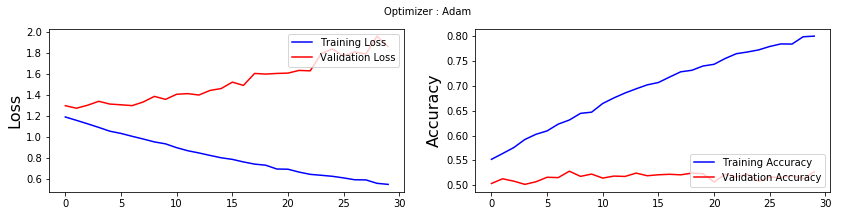

In [27]:
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], 'b', label='Training Loss')
plt.plot(hist.history['val_loss'], 'r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['acc'], 'b', label='Training Accuracy')
plt.plot(hist.history['val_acc'], 'r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [28]:

test = np.zeros((d.shape[0], 48*48))
for ix in range(test.shape[0]):
    t = tem[ix].split(' ')
    for iy in range(test.shape[1]):
        test[ix, iy] = int(t[iy])

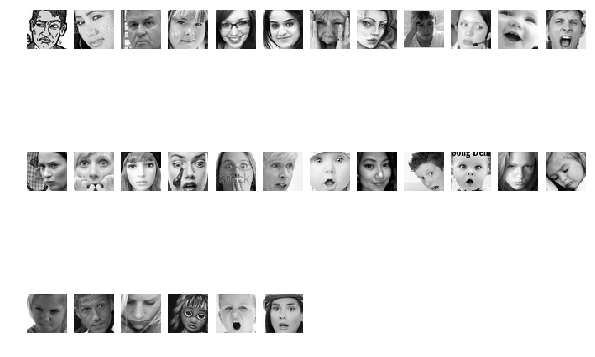

In [29]:
fig = plt.figure(figsize=(10,10))

for ix in range(30):
    ax = plt.subplot(4,12,ix+1)
    ax.set_title = ix
    plt.imshow(test[split+ix].reshape((48, 48)), cmap='gray')
    plt.axis('off')

In [30]:
pre = x_test[:100]
print (pre.shape)
ans = conv_model.predict(pre, batch_size=3)

correct=0
for ix in range(100):
    if np.argmax(ans[ix]) == np.argmax(y_test[ix]):
        correct += 1
        
print (correct)

(100, 1, 48, 48)
52


In [31]:

x_eval = x_test[343:3456]
y_eval = y[split+343:split+3456]

score = conv_model.evaluate(x_eval, y_eval, verbose=0)

In [32]:
print ("Score : ", score[0])
print ("Accuracy : ", score[1]*100)

Score :  1.914658086000437
Accuracy :  51.68647607576031
